<p style="font-size:36px;text-align:center"> <b>Titanic: Machine Learning from Disaster Project.</b> </p>

## 1. BUSINESS UNDERSTANDING.

Source:[Machine Learning Titanic Competition](https://www.kaggle.com/c/titanic/)

Data: [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic/data) 
                        

### Context:
 Source: [Discussion](https://www.kaggle.com/c/titanic/discussion)

### Problem statement : 
 Using machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 


## 2.1 Data Description :
      
      
|  Column Name       |Description                                      |    Key                                          |
| :------------:     | :--------------------------------------------:  | :--------------------------------------------:  |     
| **survival**	     | Survival                                        |  **0** = No, **1** = Yes                        |
| **pclass**         | Ticket class                                    |  **1** = 1st, **2** = 2nd, **3** = 3rd          |
| **sex**            | Sex                                             |                                                 |
| **Age**            | Age in years	                                   |                                                 |
| **sibsp**          | Number of siblings / spouses aboard the Titanic |                                                 |
| **parch**	         | Number of parents / children aboard the Titanic |	                                             |
| **ticket**	     | Ticket number                                   |                                                 |
| **fare**           | Passenger fare                                  |                                                 | 
| **cabin**          | Cabin number	                                   |                                                 |
| **embarked**       | Port of Embarkation                     |**C** = Cherbourg, **Q** = Queenstown, **S** = Southampton|         
                                                                                                           


## 2.1.1 Importing Libraries.

<p style="font-size:16px"> I'll load the important libraries needed for this machine learning project task.</p>

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, auc, classification_report, 
                             confusion_matrix, fbeta_score,precision_score,recall_score,f1_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split,KFold
from warnings import filterwarnings
import modeling_util as meu
filterwarnings("ignore")
%matplotlib inline

<p style="font-size:15px"> <i>I'll get thed data set using pandas library by storing it as df and also get the data description using <b>describe()</b> and <b>info()</b> methods.</i></p>

In [2]:
df = pd.read_csv("train.csv")

Getting the first four rows of the data set using <b>.head()</b> method.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.1.2 Statistical Summary.

In [4]:
df.describe(include=np.number).T # transposing the data set description

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


From above the maximum Number of parents / children aboard the Titanic(<b>Parch</b>) were <b>6</b> while minimum being <b>0</b>, while maximum <b>Age</b> being <b>80</b> and minimum age being less than a year for passenges who boarded titanic and averagely most people who were in the titanic were about <b>30</b> years of age, while the maximum number of siblings / spouses aboard the Titanic(<b>SibSp</b>) was <b>8</b> while minimum being <b>0</b>, roughly the maximum amount of fare was <b>512</b> while minimum being <b>0</b>. Why is minimum <b>Fare</b> is <b>0</b> maybe children within a given threshhold are not being charged.

In [5]:
df.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above there is some rows with missing <b>Age</b>, <b>Cabin</b> and <b>Embarked</b> i'll make some data imputation on them.

Let me group the three classes and see the average <b>Age</b> of people in each class using <b>.groupby()</b> method of the dataframe type.

In [6]:
AGE = pd.concat([
    df.groupby(["Pclass"])["Age"].mean()
],axis=1)
    
    
AGE

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


From the boxplot above the second class(<b>Pclass</b>) age has got outliers as shown above maybe <b>standarndadization</b> if not <b>normalization</b> will handle this.From above it is vividly depicted that old people boarded first class while middle aged boarded second class while children boarded third class reason being known little explation to the reason being attached since it's common sense.Let me use this data to make imputation on Age column for missing values with first class people age being roughly 39 from my above groupby() method of means in 3 classes, and 30 for second class while the third class being 25 years old.

In [7]:
def age_na(fill):
    Age = fill[0]
    Pclass = fill[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 39

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [8]:
df['Age'] = df[['Age','Pclass']].apply(age_na,axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The missing values of <b>Age</b> column have been filled up the remaining column with missing values are <b>Embarked</b> and <b>Cabin</b> i'll fill the <b>Embarked</b> missing values with largest number of station <b>Embarked</b> and also since <b>Embarked</b> has <b>3</b> distinct value i'll convert it to categorical data type while <b>Cabin</b> has alot of missing values hence i'll drop it during machine learning session.

In [10]:
dfn = pd.concat([
    df.groupby(["Pclass","Embarked"])["Pclass"].count()#finding total number of people embarkedin each station

    
], axis=1)#finding total number of people embarkedin each station
dfn.columns = [ 'Count']
dfn

Count
Pclass Embarked       
1      C            85
       Q             2
       S           127
2      C            17
       Q             3
       S           164
3      C            66
       Q            72
       S           353

From above the <b>Southampton</b> station had a lot of people than rest so ill use it in filling the 2 missing values in the <b>Embarked</b> column. 

In [11]:
df["Embarked"].fillna("S",inplace = True)# filling Embarked missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p style="font-size:15px"> <i>Let me convert Embarked to categorical data type using <b>.astype()</b> method.</i></p>

In [13]:
df["Embarked"] = df["Embarked"].astype("category") #converting Embarked column to categorical data type

<p style="font-size:15px"> <i>Confirming if it has been converted successfly.</i></p>

In [14]:
df["Embarked"].dtype # checking type of embarked column

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

Let me divide the people in the ship into two i.e child or adult. With year less than 18 I consider being child while anything above 18 as adult. I'll use <b>Age</b> in dividing them and I'll create another column called <b>Category</b> to hold <b>child</b> and <b>adult</b> variables.

>**Note:** Asumptions are based on my area of jurisdiction constitution stipulation as to who an adult and child should be according to number of years.

In [15]:
df['Category'] =pd.cut(df['Age'], [0, 18, 80], labels=['child', 'adult']) #creating category column

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


Bingo!!! the <b>Category</b> column have been created with pandas <b>.cut()</b> method as shown in  the above table.

I'll also add a <b>Family</b> column where I'll take into consideration <b>SibSp</b> and <b>Parch</b> columns where I'll write an expresion where the two columns should be more than one.

>**Note:** My assumption is for a family to be called a family,the number of siblings / spouses aboard the Titanic and number of parents / children aboard the Titanic	should be greater than zero.

In [17]:
df["Family"] =(df['SibSp'] != 0) & (['Parch'] != 0) #creating family column

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,False


Bingo!!! the <b>Family</b> column have been created with pandas <b>.cut()</b> method as shown in  the above table. 
I'll inspect the data frame to see if I have handled missing values and columns I've created their data type.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
 12  Category     891 non-null    category
 13  Family       891 non-null    bool    
dtypes: bool(1), category(2), float64(2), int64(5), object(4)
memory usage: 79.5+ KB


Let me inspect the uniqueness in each columns.

In [20]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Category         2
Family           2
dtype: int64

Let me convert <b>Family</b> to categorical since it has two variables either <b>True</b> or <b>False</b> for <b>Family</b> and no <b>Family</b> respectively.

In [21]:
df["Family"] = df["Family"].astype("category")# converting family from bool to categorical

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
 12  Category     891 non-null    category
 13  Family       891 non-null    category
dtypes: category(3), float64(2), int64(5), object(4)
memory usage: 79.6+ KB


Let me inspect the fare that was being paid by those who had family and those who didn't have in each station. Using below snippet of code.

In [23]:
df3 = pd.concat([
    df.groupby(["Family","Embarked"])["Fare"].mean()
], axis=1)
df3

Fare
Family Embarked           
False  C         57.918083
       Q          8.723802
       S         19.984040
True   C         63.715681
       Q         28.197222
       S         42.749617

It is evident from above that those who had family paid more than those who were alone in each station.
Let me include an <b>adult</b> and a <b>child</b> from <b>Category</b> column and <b>Sex</b> columm of <b>Female</b> and <b>Male</b> in each station and see who paid more in average.

In [24]:
df3 = pd.concat([
    df.groupby(["Category","Sex","Embarked"])["Fare"].mean()
], axis=1)
df3

Fare
Category Sex    Embarked           
child    female C         46.306255
                Q          7.565625
                S         35.083523
         male   C         38.723975
                Q         29.125000
                S         26.970268
adult    female C         86.061711
                Q         13.268625
                S         40.253003
         male   C         49.139179
                Q         12.186373
                S         20.899855

From above it is evident that females who are adults paid more than child who is female and a child of male gender from Cherbourg and Queenstown paid more than their adult counterpart.
Let me see how many were family member and between family and those who were single who died more.

In [25]:
df3 = pd.concat([
    df.groupby(["Family","Pclass","Survived"])["Survived"].count()
], axis=1)
df3.columns=["Count"]
df3


Count
Family Pclass Survived       
False  1      0            60
              1            77
       2      0            70
              1            50
       3      0           268
              1            83
True   1      0            20
              1            59
       2      0            27
              1            37
       3      0           104
              1            36

From above it is evident that in first class <b>20</b> family members died and <b>59</b> survived while <b>60</b> who had no family died and <b>77</b> survived.In the second class <b>27</b> family members died while <b>37</b> survived while their counterpart <b>70</b> died while <b>50</b> survived lastly in the third class <b>104</b> family members died and <b>36</b> survived while those who had no family <b>268</b> died and <b>83</b> survived.

Let me inspect the <b>Fare</b> that those who were family members and singles paid.

In [26]:
df4 = pd.concat([
    df.groupby(["Family","Pclass"])["Fare"].mean()
], axis=1)

df4

Fare
Family Pclass           
False  1       75.223356
       2       15.532327
       3        9.832689
True   1       99.643199
       2       30.280664
       3       23.310151

From above it is evident that family members(<b>True</b>) paid more than those who were single(<b>False</b>).

# 2.1.3 Data Visualization.

Let me draw a <b>boxplot</b> to show how people are distributed across the three classes in the ship using <b>seaborn</b> and <b>matplotlib</b> libraries .

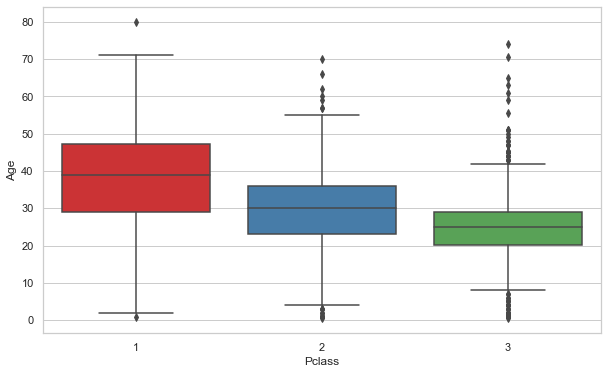

In [27]:
plt.figure(figsize=(10,6));# figure size
sns.set(style="whitegrid", color_codes=True) #  background appearance 
sns.boxplot(x='Pclass',y='Age',data=df,palette='Set1'); #plotting boxplot

From above boxplot old boarded first class while childrens boarded third class.

Let me draw a countplot using seaborn library to see how adults and children distributed themselves among three classes.

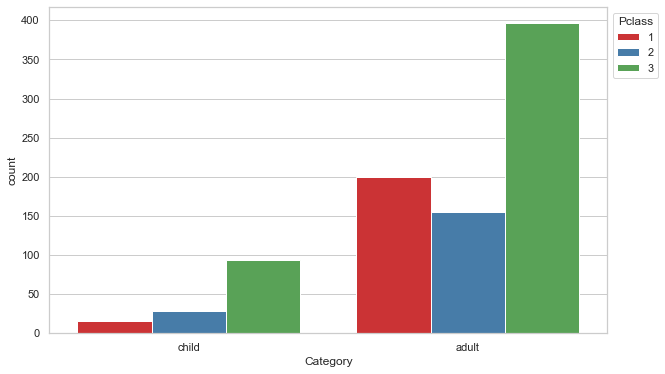

In [28]:
plt.figure(figsize=(10,6));# size of graph
sns.set_style('whitegrid'); # background style
sns.countplot(x='Category',data=df,hue="Pclass",palette='Set1'); #plotting countplot

plt.legend(bbox_to_anchor=(1, 1), loc=2,title="Pclass" );#locating legend

It is evident from above class that adults were more in all classes as compared to childrens.

Next let me draw a graph to see survival rate of both sex.

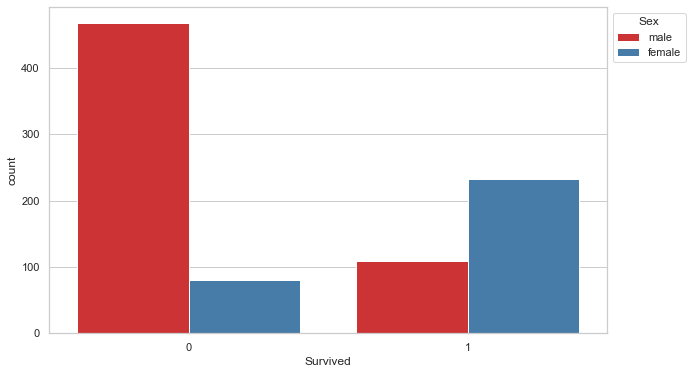

In [29]:
plt.figure(figsize=(10,6));# size of graph
sns.set_style('whitegrid');
sns.countplot(x='Survived',hue='Sex',data=df,palette='Set1');
plt.legend(bbox_to_anchor=(1, 1), loc=2,title="Sex" );#locating legend

From above graph <b>males</b> died more than <b>females</b> whle <b>female</b> survived more than <b>male</b>.

Let me also show the survival rate in each class.

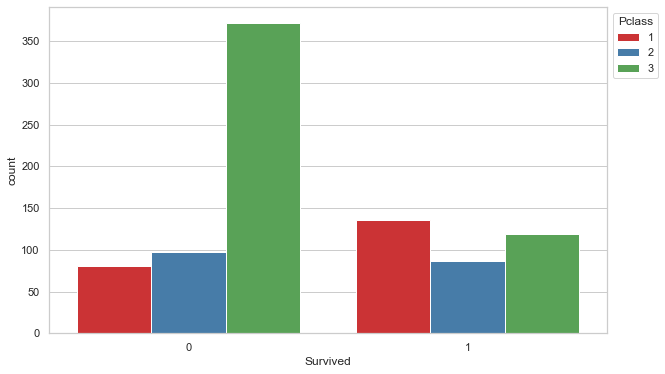

In [30]:
plt.figure(figsize=(10,6));# size of graph
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='Set1')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title="Pclass" );#locating legend

People in the first class survived more than the rest while people in third class died more than the rest.

Next let me see between children and adults who survived more.

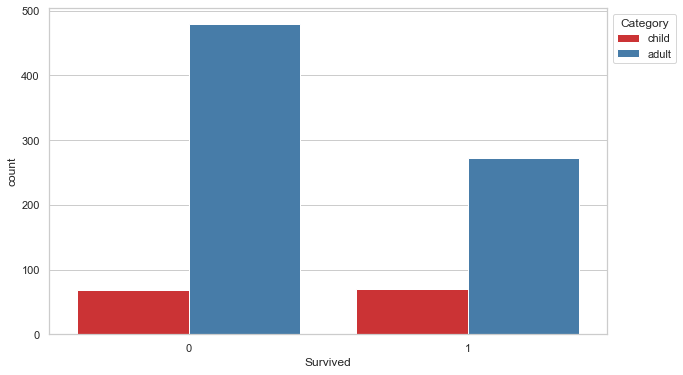

In [31]:
plt.figure(figsize=(10,6));# size of graph
sns.set_style('whitegrid');
sns.countplot(x='Survived',hue='Category',data=df,palette='Set1');
plt.legend(bbox_to_anchor=(1, 1), loc=2,title="Category" );#locating legend

In both scenarios more adults died and survived than childrens.

Next let me draw a histogram to see how fare is distributed.

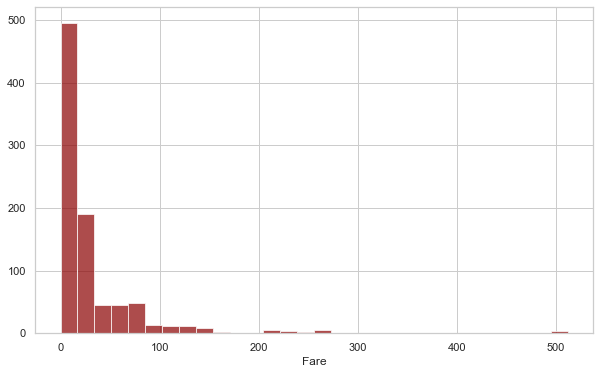

In [32]:
plt.figure(figsize=(10,6));# size of graph
df['Fare'].hist(bins=30,color='darkred',alpha=0.7);
plt.xlabel("Fare");

From above it is evident that Fare is not normal distributed and it needs to be standardized.

Next let me see how the Number of siblings / spouses who aboarded the Titanic are distributed.



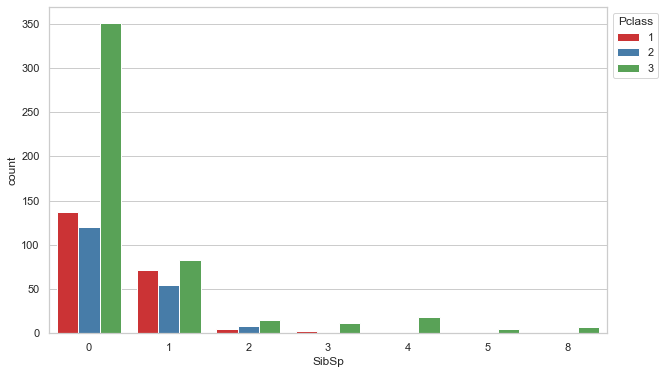

In [33]:
plt.figure(figsize=(10,6));# size of graph
sns.countplot(x='SibSp',hue="Pclass",palette="Set1",data=df);
plt.legend(bbox_to_anchor=(1, 1), loc=2,title="Pclass" );#locating legend

Fro above it is evident those who were single with no sibling and spouses were more than the rest in all classes in the Titanic.

Next let me see how the number of parents / children who aboard the Titanic are distributed.

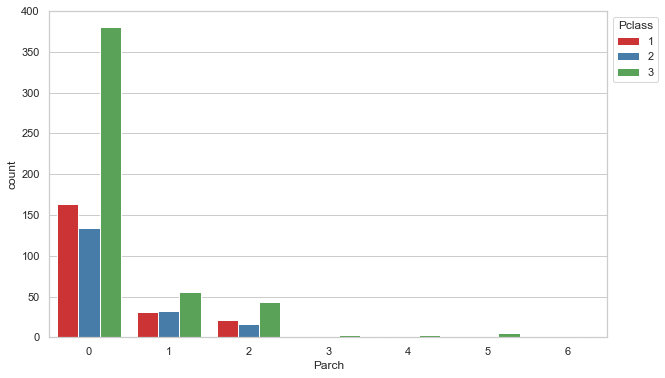

In [34]:
plt.figure(figsize=(10,6));# size of graph
sns.countplot(x='Parch',hue="Pclass",palette="Set1",data=df);
plt.legend(bbox_to_anchor=(1, 1), loc=2,title="Pclass" );#locating legend

From above it is evident that those who had 0 number of parents/children in the Titanic were more than the rest.

Next let me see if there is a correlation between different variables.

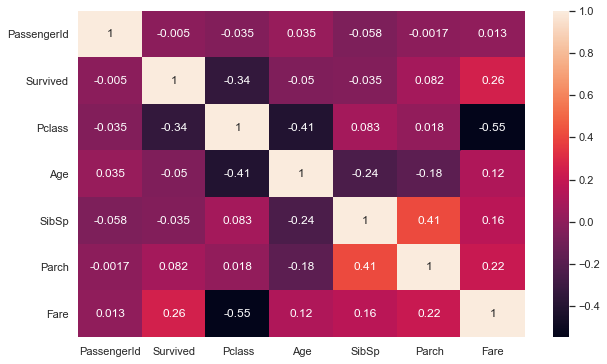

In [35]:
plt.figure(figsize=(10,6));# size of graph
sns.set_style('whitegrid'); # background style
sns.heatmap(df.corr(), annot=True);


From above the correlation between different column is minimal.

# 3. MACHINE LEARNING.

## 3.1 Feature Engineering.

Before dividing the data into features and labels I'll drop <b>Cabin</b> column since its less important and it has a lot of missing variables, I'll set <b>inplace</b> to <b>True</b> so that it si compltetely removed from the dataframe.

In [40]:
#dropping the Cabin column
df.drop('Cabin',axis=1,inplace=True)

Let me see if the Cabin column has been removed by viewing the first few rows using .head() method.

In [41]:
#printing first four values.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Category,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,False


In [42]:
#info about column and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Category     891 non-null    category
 12  Family       891 non-null    category
dtypes: category(3), float64(2), int64(5), object(3)
memory usage: 72.6+ KB


From above I can see I don't have any missing values then my data is ready for further engineering and modelling

## 3.1.1 Converting Categorical Features. 

I'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [43]:
# Converting  the categorical variables to dummy variables
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [44]:
df.drop(['Sex','Embarked','Name','Category','Family','Ticket'],axis=1,inplace=True)

I'll return the <b>Sex</b> and <b>Embarked</b> column that I had dropped durring encoding stage using a method called concat() from pandas library

In [45]:
 #concatinating sex and embark column to data
df = pd.concat([df,sex,embark],axis=1)

In [46]:
#printing first four rows
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Infering my  few rows of data I can see I have my data in numerical form for my model to work best.

Before I build the model I'll have to split  data into features and labels i.e X and y.

After splitting  data into X and y i'll further split into training set and test set whereby i'll use training set to train the model and also use it in evaluation stage in the process of developing the model.

I'll use the trained model to predict the model using the unseen test set whereby it will help in assessing how the model is performing and also its robustness.




In [47]:
# Preparing the X  and y variables.
X = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S']]
y = df["Survived"]

From <b>sklearn</b> package I'll use a module called <b>model_selection</b> which has a function called <b>train_test_split()</b> which divides the data into training and test set.

In the <b>train_test_split()</b> function I have to pass features and labels and also split my data using <b>test_size</b> argument whereby I'll set it to 30% meaning  30% of my data will be used as test set while rest as traing set.

I'll set my <b>random_state</b> to 101 for reproducibility purposes.


In [48]:
#loading library and function
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

## 3.2 Building and Evaluating Model.

Since our task at hand has labelled data and also predicted data is known so it fall under supervised typer of machine learning.

Under supervised machine learning it is divided into two classification and regression type. Classification answers the question of the form yes/no  and regession answers the questions how much?.

Since my task at hand is to predict whether a persion died or survived so it falls under classication problem and under classification i'll use below machine learning algorithms in training my model which are available in sklearn package read more about them in this link [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html).

- Gaussian Naive Bayes (GaussianNB).
- Decision Trees.
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting).
- K-Nearest Neighbors (KNeighbors).
- Support Vector Machines (SVM).
- Logistic Regression.

### 3.2.1 Implementation.

I'll implement my model using the following procedure in each algorithm.

- I'll start by importing the module
- Next I'll initialize the module using the classifier.
- After that train the model by fitting it to my data using <b>.fit()</b> method.
- I'll use trained model to make prediction using <b>predict()</b> function.The predict() function will return an array of prediction for each data instance in test set.







# 3.3.0 Building a Logistic Regression model.
Logistic regression is a type of regression where its class variable is not continous but categorical, as our cas to survival rate where it is categorical with two classes.Since I'm dealing with binary classification problem I'll use binomial logistic regression, which is of this form 
$$ Y =  \frac{e^x}{1+e^x}  $$  
$$ where\ X = B_0 + B{_1}x $$ 


I had imported the Logistic classifier in the beggining of this project what I'll do is to initialize the classifier then fit in the model using **.fit method**


> **Step 1**: First I'll `import` the models from `sklearn` and use it to instatiate the class.

In [50]:
# Importing the LogisticRegression Classifier
from sklearn.linear_model import LogisticRegression

> **Step 2:** Now that I  have imported each of the classifiers, I'll `instantiate` the classifier as below.

In [51]:
# instatiating the classifier.
logmodel = LogisticRegression()

> **Step 3:** Now that I have instantiated the model, I'll `fit` it using the **X_train** and **y_train**.

In [52]:
# Fitting your LogisticRegression class to the training data
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

> **Step 4:** Now that I have fit  the model, I will use it to `predict` on the **testing_data**.

In [53]:
# Predicting using LogisticRegression on the test data
predictions_log = logmodel.predict(X_test)

> **Step 5:** Now that I have made the predictions, I'll compare the predictions to the actual values using the function below for  the model - this will give  the `score` for how well  the model is performing.

### 3.3.1 Metrics for Evaluating Model Performance.

Let me define metrics that ill use in evaluating my model accurcy.
- **True Positive (TP)**: Correctly classified as the class of interest.
- **True Negative (TN)**: Correctly classified as not the class of interest.
- **False Positive (FP)**: Incorrectly classified as the class of interest.
- **False Negative (FN)**: Incorrectly classified as not the class of interest.

- **Accuracy** : The proportion of correct predictions out of all the predictions given by:
   
$$ Accurcy  =  \frac{TP + TN}{TP + FP + TN  + FN} $$

- **Precision** (also known as the positive predictive value) is defined as the proportion of positive examples that are truly positive, given by the formula:
$$ Precision = \frac{TP}{TP + FP}  $$

- **Recall**: This is defined as the number of true positives over the total number of positives, given by:
$$ Recall = \frac{Tp}{TP + FN}$$




- **F1 score**: It combines precision and recall using **harmonic mean** also known as **F-measure** or **F-score**, iven by:
$$ F-MEASURE = \frac{2 \cdot precision \cdot recall}{recall + precision} = \frac{2 \cdot TP }{2 \cdot TP + FP + FN}$$





- **Confusion matrix**: This is a **n x n**  matrix that is used to compare predicted values to actual values.As shown below.
 <img src="confusion Matrix.PNG">
 

In [54]:
def model_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score for : ', format(accuracy_score(y_true, preds)))
        print('Precision score for : ', format(precision_score(y_true, preds)))
        print('Recall score for : ', format(recall_score(y_true, preds)))
        print('F1 score for: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score for ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score for ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score for ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [55]:
# Printing Logistic scores
model_metrics(y_test, predictions_log, 'LOGISTIC')

Accuracy score for LOGISTIC : 0.7686567164179104
Precision score for LOGISTIC : 0.782608695652174
Recall score for LOGISTIC : 0.631578947368421
F1 score for LOGISTIC : 0.6990291262135923





From above it's evident that the **Logistic regession** has an **accuracy** of **77%** with **precision** rate being **78%** while **recall** score being **63%** and **f1** score as **70%**.

Next I'll use below code snippet in coming up with **confusion matrix** and make deduction on how the features have been predicted.

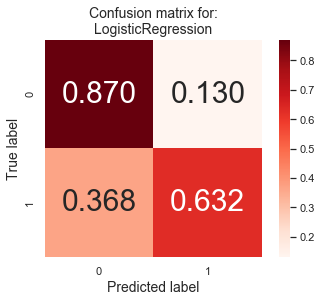

In [56]:
from sklearn.metrics import confusion_matrix

for m, model in enumerate([logmodel]):
    confusion_mat= confusion_matrix(y_test, model.predict(X_test))
    confusion_mat= confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] # normalizing the data

    # Plotting the heatmap
    plt.figure(m)
    sns.heatmap(confusion_mat, annot=True, annot_kws={"size":30}, cmap='Reds', square=True, fmt='.3f')
    plt.ylabel('True label',fontdict={"size":14})
    plt.xlabel('Predicted label',fontdict={"size":14})
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__),fontdict={"size":14});

From above **87%** of the labels was correctly predicted as **death** and **63%** as **survived** while **37%** of the **survived** label was predicted incorrectly and **13%** of death labels were misclassified as **survived**.

# 3.4 Building a KNN model.
This method is called lazy learning because parameters for modelling purposes is not defined.For new data point prediction, the train data is searched for an instance resembling the new instance to be predicted.During modelling purposes the training themselves conjures the knowledge.In determining the proper class during modelling phace KNN looks for the closest points-the nearest neighbors.In order to determine the neighbors to be modelled by algorithm the k comes into play, for example if k=6, six nearest neighbors will be examined.IThe weakness of the algorithm is of equal weight attached traning all the six points even if some of them are meaningless.





> **Step 1**: First I'll `import` the model from `sklearn` and use it to instatiate the class.

In [57]:
# Import the KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

> **Step 2:** Now that I  have imported each of the classifiers, I'll `instantiate` the classifier.

In [58]:
# Instantiate a KNeighborsClassifier with:
# n_neighbors=1 and everything else as default values
mod_knn = KNeighborsClassifier(n_neighbors=1)

> **Step 3:** Now that I have instantiated the model, I'll `fit` it using the **X_train** and **y_train**.

In [59]:
# Fitting your KNeighborsClassifier to the training data
mod_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

> **Step 4:** Now that I have fit  the model, I will use it to `predict` on the **testing_data**.

In [60]:
# Predicting using KNeighborsClassifier on the test data
preds_knn = mod_knn.predict(X_test)

> **Step 5:** Now that I have made the predictions, I'll compare the predictions to the actual values using the function below for  the model .This will give  the `score` for how well  the model is performing.

In [61]:
# Printing KNeighbors scores
model_metrics(y_test, preds_knn, 'KNN')

Accuracy score for KNN : 0.5932835820895522
Precision score for KNN : 0.5242718446601942
Recall score for KNN : 0.47368421052631576
F1 score for KNN : 0.4976958525345622





From above it's evident that the **KNeighbors** has an **accuracy** of **59%** with **precision** rate being **52%** while **recall** score being **47%** and **f1** score as **50%**.


Next I'll use below code snippet in coming up with confusion matrix and make deduction on how the features have been predicted.

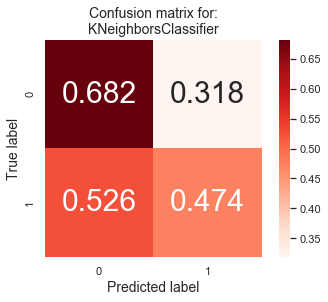

In [62]:
from sklearn.metrics import confusion_matrix

for m, model in enumerate([mod_knn]):
    confusion_mat= confusion_matrix(y_test, model.predict(X_test))
    confusion_mat= confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] # normalizing the data

    # Plot the heatmap
    plt.figure(m)
    sns.heatmap(confusion_mat, annot=True, annot_kws={"size":30}, cmap='Reds', square=True, fmt='.3f')
    plt.ylabel('True label',fontdict={"size":14})
    plt.xlabel('Predicted label',fontdict={"size":14})
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__),fontdict={"size":14});

From above **68%** of the labels was correctly predicted as **death** and **47%** as **survived** while **52%** of the **survived** label was predicted incorrectly and **31%** of death labels were misclassified as **survived**.

# 3.5 Building a DECISION TREE model.

A decision tree works by generating a separating hyperplane or a threshold for the features in data. It does this by considering every feature and finding the correlation between the spread of the values in that feature and the label that you are trying to predict.


> **Step 1**: First I'll `import` the model from `sklearn` and use it to instatiate the class.

In [98]:
# Importing the  DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

> **Step 2:** Now that I  have imported each of the classifiers, I'll `instantiate` the classifier.

In [99]:
# Instantiating a DecisionTreeClassifier
mod_tree = DecisionTreeClassifier()

> **Step 3:** Now that I have instantiated the model, I'll `fit` it using the **X_train** and **y_train**.

In [100]:
# Fiting your DecisionTreeClassifier to the training data
mod_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

> **Step 4:** Now that I have fit  the model, I will use it to `predict` on the **testing_data**.

In [101]:
# Predicting  using DecisionTreeClassifie on the test data
predictions_tree = mod_tree.predict(X_test)

> **Step 5:** Now that I have made the predictions, I'll compare the predictions to the actual values using the function below for  the model . This will give  the `score` for how well  the model is performing.

In [102]:
# Printing the Decision Tree classifier.
model_metrics(y_test, predictions_tree, 'Decision Tree')

Accuracy score for Decision Tree : 0.7388059701492538
Precision score for Decision Tree : 0.7340425531914894
Recall score for Decision Tree : 0.6052631578947368
F1 score for Decision Tree : 0.6634615384615384





From above it's evident that the **Decision Tree** has an **accuracy** of **74%** with **precision** rate being **783%** while **recall** score being **61%** and **f1** score as **66%**.


Next I'll use below code snippet in coming up with confusion matrix and make deduction on how the features have been predicted.

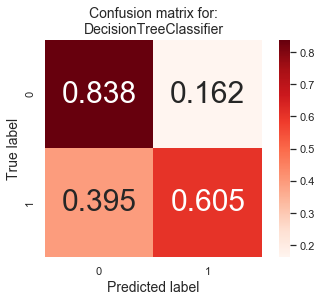

In [106]:
from sklearn.metrics import confusion_matrix

for m, model in enumerate([mod_tree]):
    confusion_mat= confusion_matrix(y_test, model.predict(X_test))
    confusion_mat= confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] # normalizing the data

    # Plot the heatmap
    plt.figure(m)
    sns.heatmap(confusion_mat, annot=True, annot_kws={"size":30}, cmap='Reds', square=True, fmt='.3f')
    plt.ylabel('True label',fontdict={"size":14})
    plt.xlabel('Predicted label',fontdict={"size":14})
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__),fontdict={"size":14});

From above **83%** of the labels was correctly predicted as **death** and **61%** as **survived** while **40%** of the **survived** label was predicted incorrectly and **16%** of death labels were misclassified as **survived**.

# 3.6 Building Support Vector Model.

Support vector is like a points of plotted in multidimensional expessing values and their examples.The support vector machine(SVM) creates a boundary called hyperplane, which divides the space creating homogeneous partition on either side, hence combining Nearest Neighbor and Linear Regression methods.SVM uses the idea of what is known as Maximum Marginal Hyperplane which create greater separation between two classes.Kernel Trick is also applied in seperating the two classes.

Some of the kernel trick applied include:
Kernell function takes this form:
<img src="kernell.PNG"> 
where Greek letter phi, that is, ϕ(x), is a mapping of the data into another space. Therefore,  the general kernel function applies some transformation to the feature vectors xi and 
xj and combines them using the dot product, which takes two vectors and returns a  single number.
1. linear kernel which does not transform data at all, given by the formula:
 <img src="ln.PNG">

2. Polynomial kernel of degree d which adds a simple nonlinear transformation of data.
 <img src="poly.PNG">
3. Sigmoid Kernel: Is almost like sigmoid activation function used in neural network.Given by the formula.
<img src="sigmoid.PNG">
4. Gaussian RBF Kernel which is anologous to RBF neural network.It does well in many types of data.
 <img src="gaussian.PNG">
 
First I'll load the package necessary for the modelling from **sklearn** where it has a method called **svm** which has **SVC** function embedded for training support vector machine modells as below.

> **Step 1**: First I'll `import` the model from `sklearn` and use it to instatiate the class.

In [63]:
from sklearn.svm import SVC #loading library necessary for modelling

> **Step 2:** Now that I  have imported each of the classifiers, I'll `instantiate` the classifier.

In [64]:
model_svc = SVC() #instatiate the model

> **Step 3:** Now that I have instantiated the model, I'll `fit` it using the **X_train** and **y_train**.

In [65]:
model_svc.fit(X_train,y_train) #fitting trained model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

> **Step 4:** Now that I have fit  the model, I will use it to `predict` on the **testing_data**.

In [66]:
predictions_svm = model_svc.predict(X_test) #predicting the feature labels

> **Step 5:** Now that I have made the predictions, I'll compare the predictions to the actual values using the function below for  the model . This will give  the `score` for how well  the model is performing.

In [67]:
# Printing Support Vector Machine scores.
model_metrics(y_test, predictions_svm, 'Support Vector Machine')

Accuracy score for Support Vector Machine : 0.6044776119402985
Precision score for Support Vector Machine : 0.75
Recall score for Support Vector Machine : 0.10526315789473684
F1 score for Support Vector Machine : 0.1846153846153846





From above it's evident that the **Support Vector Machine**  has an **accuracy** of **60%** with **precision** rate being **75%** while **recall** score being **11%** and **f1** score as **18%**.


Next I'll use below code snippet in coming up with confusion matrix and make deduction on how the features have been predicted.

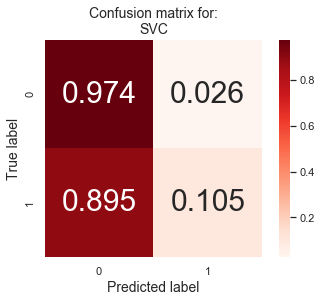

In [69]:
from sklearn.metrics import confusion_matrix

for m, model in enumerate([model_svc]):
    confusion_mat= confusion_matrix(y_test, model.predict(X_test))
    confusion_mat= confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] # normalizing the data

    # Plot the heatmap
    plt.figure(m)
    sns.heatmap(confusion_mat, annot=True, annot_kws={"size":30}, cmap='Reds', square=True, fmt='.3f')
    plt.ylabel('True label',fontdict={"size":14})
    plt.xlabel('Predicted label',fontdict={"size":14})
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__),fontdict={"size":14});

From above **97%** of the labels was correctly predicted as **death** and **11%** as **survived** while **90%** of the **survived** label was predicted incorrectly and **3%** of death labels were misclassified as **survived**.

Next I'll use ensemble type of classification in modelling the classification problem at hand and see if there will be some improvement on perfomance of the model

# 3.6 Ensemble Learning Model.

Ensemble learning, as the name denotes, is a method that combines several machine learning models to generate a superior model, thereby decreasing variability/variance and bias, and boosting performance, as shown below.
<img src="Ensemble.PNG">

Ensemble models combine many weaker models that differ in variance and bias, thereby creating a better model, outperforming the individual weaker models.

<img src="ensemble_chart.PNG">

In  modelling  the  ensemble  learning  type  of  classification  I'll  follow the following 5 methods.

1. **Importing** the model.
2. **Instantiating** the model with the hyperparameters of interest.
3. **Fitting** the model to the training data.
4. **Predicting** on the test data.
5. **Scoring** the model by comparing the predictions to the actual values.

I'll follow the above steps in modelling each of the ensemble methods: **BaggingClassifier**, **RandomForestClassifier**, and **AdaBoostClassifier**.
 
For more info about the above ensemble methods can be found below:
* [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier)
* [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)

Another really useful guide for ensemble methods can be found [in the documentation here](http://scikit-learn.org/stable/modules/ensemble.html).

> **Step 1**: First I'll `import` the models from `sklearn` and use them to instatiate the class.

In [70]:
# Importing the Bagging, RandomForest, and AdaBoost Classifier.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

> **Step 2:** Now that I  have imported each of the classifiers, I'll `instantiate` each with the hyperparameters specified in each comment.

In [71]:
# Instantiating a RandomForestClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
mod_rf = RandomForestClassifier(n_estimators=500)

# Instantiating an a AdaBoostClassifier with:
# With 300 weak learners (n_estimators) and a learning_rate of 0.2
mod_ada = AdaBoostClassifier(n_estimators=600, learning_rate=0.2)

> **Step 3:** Now that I have instantiated each of the models, I'll `fit` them using the **X_train** and **y_train**.  This may take a bit of time, I'm fitting 1100 weak learners after all!

In [72]:
# Fit your RandomForestClassifier to the training data
mod_rf.fit(X_train, y_train)

# Fit your AdaBoostClassifier to the training data
mod_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=600, random_state=None)

> **Step 4:** Now that I have fit each of the models, I will use each to `predict` on the **testing_data**.

In [73]:
# Predicting using RandomForestClassifier on the test set data
preds_rf = mod_rf.predict(X_test)

# Predicting using AdaBoostClassifier on the test set data
preds_ada = mod_ada.predict(X_test)


> **Step 5:** Now that I have made the predictions, I'll compare the predictions to the actual values using the function below for each of the models - this will give  the `score` for how well each of the models is performing.

In [74]:
# Print Random Forest scores
model_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
model_metrics(y_test, preds_rf, 'adaboost')

Accuracy score for random forest : 0.832089552238806
Precision score for random forest : 0.8556701030927835
Recall score for random forest : 0.7280701754385965
F1 score for random forest : 0.7867298578199052



Accuracy score for adaboost : 0.832089552238806
Precision score for adaboost : 0.8556701030927835
Recall score for adaboost : 0.7280701754385965
F1 score for adaboost : 0.7867298578199052





From above it's evident that the random forest has an **accuracy** of **83%** with **precision** rate being **86%** while **recall** score being **73%** and **f1** score as **79%** while  adaboost has an **accuracy** of **83%** with **precision** rate being **86%** while **recall** score being **73%** and **f1** score as **79%** which are the same.


Next I'll use below code snippet in coming up with confusion matrix and make deduction on how the features have been predicted.

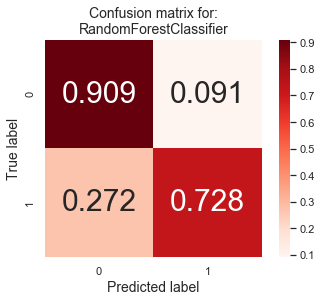

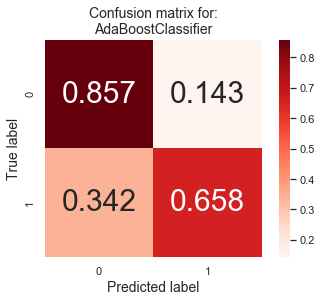

In [75]:
from sklearn.metrics import confusion_matrix

for m, model in enumerate([mod_rf,mod_ada]):
    confusion_mat= confusion_matrix(y_test, model.predict(X_test))
    confusion_mat= confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] # normalizing the data

    # Plot the heatmap
    plt.figure(m)
    sns.heatmap(confusion_mat, annot=True, annot_kws={"size":30}, cmap='Reds', square=True, fmt='.3f')
    plt.ylabel('True label', fontdict={"size":14})
    plt.xlabel('Predicted label',fontdict={"size":14})
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__),fontdict={"size":14});

In **Random Forest* **91%** of the labels was correctly predicted as **death** and **73%** as **survived** while **27%** of the **survived** label was predicted incorrectly and **9%** of death labels were misclassified as **survived**.

In **AdaBoost* **86%** of the labels was correctly predicted as **death** and **66%** as **survived** while **34%** of the **survived** label was predicted incorrectly and **14%** of death labels were misclassified as **survived**.

Finally I'll compare all the algorithms that I have used in training the model and choose which is the best and use it tuning the model and also in making general overal deduction of the model perfomance.

|**Algorithm Name**          |**Accuracy score**|**Precision score** |**Recall score**    |**F1 score**        |
| :------------:             | :------------:   | :--------------:   | :----------------: | :--------------:   |     
| **Logistic Regression**    | 0.76865671641791 | 0.7826086956521740 | 0.631578947368421  |  0.699029126213592 |
| **K-Nearest Neighbors**    | 0.59328358208965 | 0.5242718446601942 | 0.473684210526316  | 0.4976958525345622 |
| **Decision Tree**          | 0.73880597014926 | 0.7340425531914894 | 0.605263157894737  | 0.6634615384615384 |
| **Support Vector Machine** | 0.75373134328358 | 0.7500000000000000 | 0.631578947368421  | 0.6857142857142857 |
| **AdaBoost**               | 0.83208955223880 | 0.8556701030927835 | 0.728070175438597  | 0.7867298578199052 |
| **Random Forest**          | 0.83208955223880 | 0.8556701030927835 | 0.728070175438597  | 0.7867298578199052 |


From above table it's evident that adaboost and random forest are the best algorithm for training the overal perfomance of the model and also it's tuning process.

Next I'll use adaboost in tuning the model to see it's improvement i"ll use gridsearchCv method of model tuning.

# 4. Optimizing The Model.

# 4.1 GridSearchCV.

GridsearchCV is a method of tuning wherein the model can be built by evaluating the combination of parameters mentioned in a grid.

I can conduct a grid search much more easily in practice by leveraging **model_selection.GridSearchCV**.

In [95]:
# Importing 'GridSearchCV', 'make_scorer' 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Starting the timer
start = time()

# Initializing the classifier
mod_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

# Creating the parameters list for tuning
parameters = {'n_estimators':[20, 50, 120], 
              'learning_rate':[0.1, 0.5, 1.],
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# Making an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_search = GridSearchCV(mod_ada, parameters, scorer)

# Fitting the grid search object to the training data and finding the optimal parameters
grid_fit = grid_search.fit(X_train, y_train)

# Getting the estimator
best_mod = grid_fit.best_estimator_

# Making predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_mod.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_mod)

# Printing runtime
end = time()
runtime = end - start
print("Runtime:", runtime)

Unoptimized model
------
Accuracy score on testing data: 0.7425
F-score on testing data: 0.7072

Optimized Model
------
Final accuracy score on the testing data: 0.7873
Final F-score on the testing data: 0.7792
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         mi

# 5. Feature Importance.
In any supervised machine learning model it's best to identify the features that affect how the model perfom best.Like in the titanic case I identify which features most affect the survival rate of passengers in the titanic.

From all the features in the titanic dataset I'll use only the top 5 of the features that affect the how the model perfom as shown below

In [90]:
import matplotlib.pyplot as plt
def feature_plot(importances, X_train, y_train):
    
    # Displaying the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creating the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  


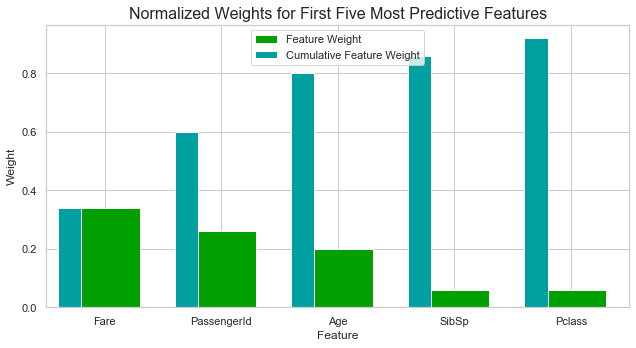

In [91]:
# Importing a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# Training the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train,y_train)

# Extracting the feature importances
importances = model.feature_importances_

# Plotting features.
feature_plot(importances, X_train, y_train)

# 5.1. Feature Selection.
An interesting thing to think about here is that how does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower, at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of all features present in the data. This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. The code cell below will use the same optimized model we found earlier, and train it on the same training set with only the top five important features.

In [94]:
# Importting functionality for cloning a model
from sklearn.base import clone

# Reducing the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Training on the "best" model found from grid search earlier
mod_ada = (clone(best_mod)).fit(X_train_reduced, y_train)

# Making new predictions
reduced_predictions = mod_ada.predict(X_test_reduced)

# Reporting scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.7873
F-score on testing data: 0.7792

Final Model trained on reduced data
------
Accuracy on testing data: 0.6754
F-score on testing data: 0.6150


From above it can be seen that training on full data gives the best score as compared to training on reduced data since there is reduction in score from 78% to 68%.Therefore it's best to make inference on features that make great impact to the model but not training using the only those features but on whole features.

Thank you for going through my first project in my blog stay in touch for more complex projects,